### Measures of Center, Spread and Dependency

Let's take the example of Bitcoin price values for a period of 3 months and explore the measures of center (Mean, Median, Mode), Spread (Range, Variance, Standard Deviation) and Dependency (Covariance and Correlation) 

#### Import necessary packages and the data

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to help with statistical analysis
from scipy.stats import *
import statsmodels.stats as sm
import statistics
from random import sample


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the dataset
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df = pd.read_csv('bitcoin.csv')

Saving bitcoin.csv to bitcoin (1).csv


In [3]:
# Display
df.head(5)

,date,unit_price,mining_cost
0,07-Jan-22,41546.7,13133.35
1,08-Jan-22,41672.0,20330.00
2,10-Jan-22,41832.2,19130.10
3,09-Jan-22,41848.3,13304.15
4,17-Jan-22,42209.3,19449.65


#### Measures of Center

Calculate the overall mean value

In [4]:
# Calculate Mean Value
df['unit_price'].mean()


53818.87837837836

Calculate the overall median value

In [5]:
# Calculate Median Value
df['unit_price'].median()


53914.7

In [6]:
df['unit_price'].describe()

count      111.000000
mean     53818.878378
std       7354.904153
min      41546.700000
25%      47570.900000
50%      53914.700000
75%      60775.700000
max      67527.900000
Name: unit_price, dtype: float64

#### Measure of Spread

In [10]:
# Range of unit price
max(df['unit_price']) - min(df['unit_price'])


25981.199999999997

In [16]:
(df['unit_price']-df['unit_price'].mean()).abs().mean()

6537.719113708304

In [12]:
# Variance of unit price
statistics.variance(df['unit_price'])

54094615.10152826

In [13]:
# Standard Deviation of unit price
statistics.stdev(df['unit_price'])

7354.904153116358

#### Measure of Dependency

Let's check if there is a relationship between the unit price of bitcoin and the mining cost by plotting a scatter polt

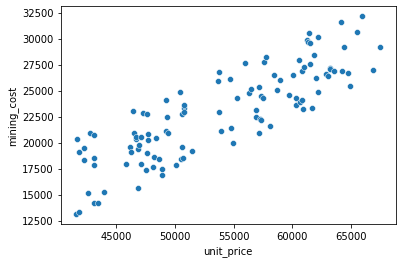

In [17]:
sns.scatterplot(data=df, x=df['unit_price'], y=df['mining_cost'])

In [21]:
# Calculate the correlation coeffecient between unit price and mining cost
np.corrcoef(df['unit_price'], df['mining_cost'])[0,1]

0.8464711580791602

### Central Limit Theorm

#### Function to get sample averages

Before we explore the data and draw random samples, let's write a function to draw **n** samples from a distribution with each sample having a sample size of **m**, and store the sample means in a global list

In [22]:
def clt(n,m,data):
  '''
  Function to gather sample means from a distribution
  '''
  global avg_values # declared as global to use outside this function
  avg_values = [] # start with an empty list
  for i in range(n): # for each sample
    rand_sample = sample(list(data),m) # get m datapoints 
    avg = sum(rand_sample) / len(rand_sample) # find the average
    avg_values.append(avg) # append into the sample average list

#### Observe the data distribution

#### Simulating the Central Limit Theorem

Let's run the function we created to get the sample averages and plot the distribution for different number of samples. Consider we draw constant of 30 random datapoint in each sample.

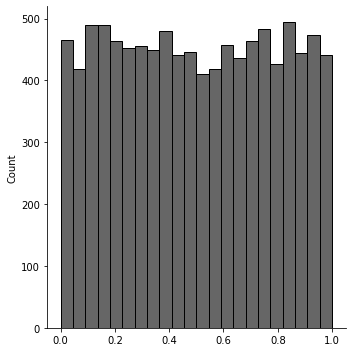

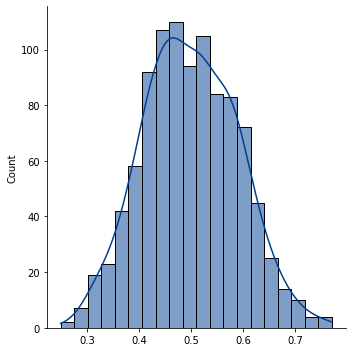

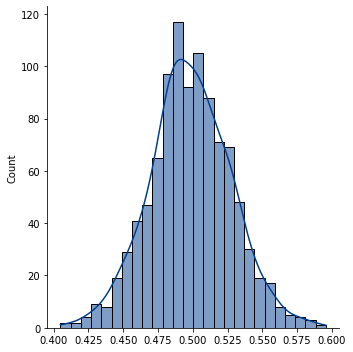

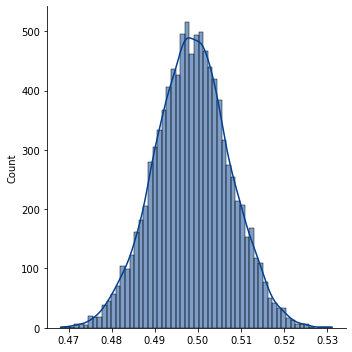

In [25]:
dataArray=np.random.uniform(0,1,10000)

sns.displot(data=dataArray,kde=False,color='#333333')

clt(1000,10,dataArray) # drawing 1000 samples of size 10 each
sns.displot(data=avg_values,kde=True,color='#003f91')

clt(1000,100,dataArray) # drawing 1000 samples of size 100 each
sns.displot(data=avg_values,kde=True,color='#003f91')

clt(10000,1000,dataArray) # drawing 1000 samples of size 100 each
sns.displot(data=avg_values,kde=True,color='#003f91')


**Observation**: You can see that larger the n (sample size), the distribution of the sample averages tends to normabe l distribution with smaller standard  dev

Let's try the same experiment for the randomly distributed data

**Observation**: Irrespective of the type of distribution, plotting the distribution of means of randomly drawn samples always results into a Normal distribution - validating the **Central Limit Theorem**

**Time to Experiment**: Change the values of n (number of samples) and m (sample size) in the function above and observe how the distribution is changing 

### One Sample t-test

E-retail is an online retaliler that operates across the globe. This company is known for their query resolution time being better than industry standards, that is 10 hours on average per ticket. The CEO of the company has to give a presentation to investors for raising funds and he wants to validate his claim of query resolution time.

You are a data scientist and you are tasked to validate this claim using Hypothesis Testing. You have been given a random sample of 100 support ticket resolution time.

In [26]:
# Import the data in to pandas dataframe
from google.colab import files
import io

try:
    uploaded3
except NameError:
    uploaded3 = files.upload()

df = pd.read_csv('support_time.csv')

Saving support_time.csv to support_time (1).csv


In [27]:
# Display the data
df.head(5)

,support_res_time
0,11
1,13
2,11
3,7
4,8


Let's observe what the distribution of support resolution time is, with the mean value

In [28]:
df['support_res_time'].mean()

9.41

Let's compare E-retails query resolution mean with the industry mean of query resolution time

In [29]:
df['support_res_time'].std()

2.3272431342815483

Let's frame the null and alternative hypothesis based on the above claim and generate the **t-statistic**, **p-value** and the **confidence interval**

$H_0:$ The mean time in hours for support ticket resolution by E-retail company is **greater than or equal** to industry standards

$H_a:$ The mean time in hours for support ticket resolution by E-retail company is **lesser** than industry standards

In [30]:
hyp_mean = 10
t_stat, p_value = ttest_1samp(df['support_res_time'], hyp_mean)

print("Test Statistic =",t_stat)
print("p-value =",p_value)

Test Statistic = -2.5351884867935843
p-value = 0.012804246305382051


**Conclusion**: 

Considering our significance level to be 5%, we can see that the p-value is less than 0.05. This rejects the null hypothesis and accepts the alternate; which implies that there is enough evidence to support the claim that E-retail's query resolution time is better than industry standards.

***